## Pyber Data Visualization
### the following graphs demonstrate the relationships between Uber drivers, total rides, average fare, city type

In [1]:
# function used to generate custom legends for the scatter plot
def set_color(c):
    if c == 'Urban':
        return 'lightcoral'
    elif c == 'Rural':
        return 'Gold'
    else:
        return 'lightskyblue'

In [2]:
# Magic function
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(ride_df, city_df, how='left')
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
xlim = df.groupby(['city'])['city'].count()
ylim = df.groupby(['city'])['fare'].mean()
slim = df.groupby(['city'])['driver_count'].min()
clim = df.groupby(['city'])['type'].unique().str[0]

In [4]:
# join the series back into a single dataframe with two level indexes (type, city)
df2 = pd.DataFrame(
    {
        'Rides':xlim,
        'Avg Fare': ylim,
        'Driver Count': slim,
        'Type': clim
    }
)

# add a column in dataframe to have bubble color information 
colorList = list(df2['Type'])
colorList = [set_color(y) for y in colorList]

df2['Color'] = colorList
df2.head()

,Rides,Avg Fare,Driver Count,Type,Color
city,,,,,
Amandaburgh,18,24.641667,12,Urban,lightcoral
Barajasview,22,25.332273,26,Urban,lightcoral
Barronchester,16,36.422500,11,Suburban,lightskyblue
Bethanyland,18,32.956111,22,Suburban,lightskyblue
Bradshawfurt,10,40.064000,7,Rural,Gold


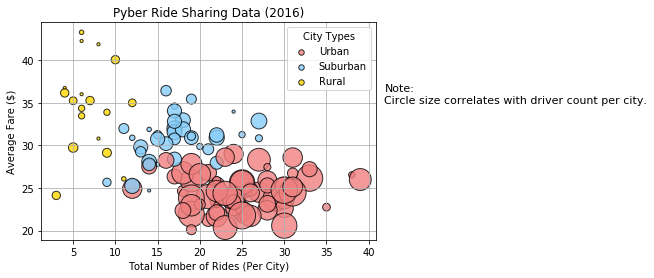

In [5]:
# the fun begins: 
# build a scatter plot

PyberPlot1 = df2.plot.scatter('Rides','Avg Fare', c=df2['Color'], s=(df2['Driver Count']*10), alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# build the custom legend
for myType in ['Urban', 'Suburban', 'Rural']:
    plt.scatter([], [], s=30, label=myType, c=set_color(myType), edgecolors='black', alpha=0.8)
plt.legend(scatterpoints=1, frameon=True, title='City Types')

# build a custom text label on the side of the graph
textstr = 'Note:\nCircle size correlates with driver count per city.'
plt.text(0.92, 0.6, textstr, fontsize=11, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('bubble_plot.png')

# Show plot
plt.show()

## Total Fares by City Type

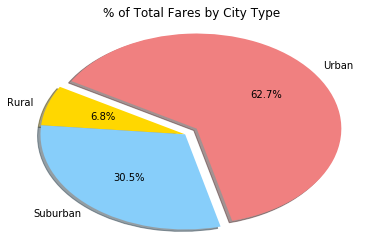

In [6]:
# Calculate Type Percents
totalFares = df.groupby(['type'])['fare'].sum().to_dict()

sizes = totalFares.values()

labels = totalFares.keys()

explode = (0, 0, 0.1)

colors = ['gold','lightskyblue','lightcoral']


# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.axis('auto')
plt.title('% of Total Fares by City Type', fontsize=12)

# Save Figure
plt.savefig('total-fare-by-city.png')

# Show Figure
plt.show()

## Total Rides by City Type

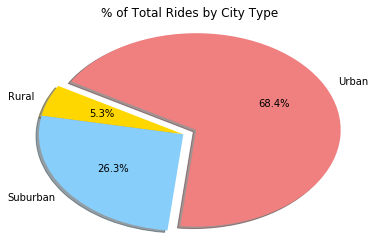

In [7]:
# Calculate Ride Percents
totalRides = df.groupby(['type'])['ride_id'].count().to_dict()
sizes1 = totalRides.values()
labels1 = totalRides.keys()
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']

# build the pie chart
plt.pie(sizes1, explode=explode, labels=labels1, colors=colors, shadow=True, startangle=150, autopct="%1.1f%%")
plt.axis('auto')
plt.title('% of Total Rides by City Type', fontsize=12)

# Save Figure
plt.savefig('pct-of-rides-by-city.png')

# Show Figure
plt.show()

## Total Drivers by City Type

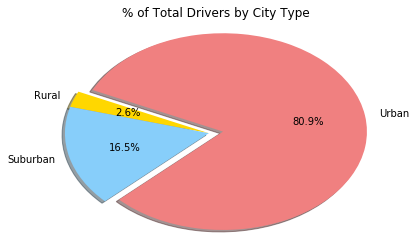

In [8]:
# Calculate Driver Percents
totalDrivers = df2.groupby(['Type'])['Driver Count'].sum().to_dict()

# build the pie chart
sizes2 = totalDrivers.values()
labels2 = totalDrivers.keys()
explode = (0, 0, 0.1)
colors = ['gold','lightskyblue','lightcoral']

plt.pie(sizes2, explode = explode, labels=labels2, colors=colors, shadow=True, startangle=155, autopct="%1.1f%%")
plt.axis('auto')
plt.title('% of Total Drivers by City Type', fontsize=12)

# Save Figure
plt.savefig('pct-of-drivers-by-city.png')

# Show Figure
plt.show()